In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# # Load data and set directory

In [2]:
#Setting directory and read csv output from the GEE
belmontdir = "C:/Users/Nazia/Documents/OSU/Belmont/PlotData/"
doyNTL_grid3 = "allNTL_grid3.csv" 
df = pd.read_csv(belmontdir + doyNTL_grid3)

In [3]:
df.columns

Index(['system:index', 'mean', 'settl_pcod', '.geo'], dtype='object')

# # Drop '.geo'

In [4]:
df_dropped = df.drop(columns=[".geo"])

new_file_path = "C:/Users/Nazia/Documents/OSU/Belmont/Data/Dropped_doyNTL_grid3.csv"
df_dropped.to_csv(new_file_path, index=False)

In [5]:
df_dropped.head(5)

,system:index,mean,settl_pcod
0,2012_01_19_00000000000000000000,0.164565,MG11117000035
1,2012_01_20_00000000000000000000,0.361161,MG11117000035
2,2012_01_21_00000000000000000000,0.164565,MG11117000035
3,2012_01_22_00000000000000000000,0.164565,MG11117000035
4,2012_01_23_00000000000000000000,0.164565,MG11117000035


In [6]:
#Create new column with only DOY from the index
df_dropped['DoY'] = df_dropped['system:index'].astype(str).str[:10]

In [7]:
df_dropped.columns

Index(['system:index', 'mean', 'settl_pcod', 'DoY'], dtype='object')

In [8]:
#Pivot the table
df_pivot = df_dropped.pivot(index='settl_pcod', columns='DoY', values='mean')

In [9]:
print(df_pivot)

DoY            2012_01_19  2012_01_20  2012_01_21  2012_01_22  2012_01_23  \
settl_pcod                                                                  
MG11117000035    0.164565    0.361161    0.164565    0.164565    0.164565   

DoY            2012_01_24  2012_01_25  2012_01_26  2012_01_27  2012_01_28  \
settl_pcod                                                                  
MG11117000035    0.164565    0.164565    0.164565    0.238639      0.4004   

DoY            ...  2023_12_21  2023_12_22  2023_12_23  2023_12_24  \
settl_pcod     ...                                                   
MG11117000035  ...    0.133834    0.133834    0.133834    0.133834   

DoY            2023_12_25  2023_12_26  2023_12_27  2023_12_28  2023_12_29  \
settl_pcod                                                                  
MG11117000035    0.133834    0.133834    0.133834    0.133834    0.133834   

DoY            2023_12_30  
settl_pcod                 
MG11117000035    0.641041  

[1 rows 

In [10]:
print(df_pivot.index.name)

settl_pcod


In [11]:
# Specify the file path for the new CSV file
output_file_path = belmontdir + "pivoted_allNTL_grid3.csv"  # Adjust the file name as needed

# Save the pivoted DataFrame to a CSV file
df_pivot.to_csv(output_file_path, index=True)

In [12]:
# Load your CSV file
df_new = pd.read_csv("C:/Users/Nazia/Documents/OSU/Belmont/PlotData/pivoted_allNTL_grid3.csv")

# Rename columns
df_new.columns = [col.replace('_', '-') if col != 'settl_pcod' else col for col in df_new.columns]

# Save the modified DataFrame back to a CSV file, if needed
df_new.to_csv("C:/Users/Nazia/Documents/OSU/Belmont/PlotData/allNTL_grid3_datetime.csv", index=False)


In [13]:
print(df_new)

      settl_pcod  2012-01-19  2012-01-20  2012-01-21  2012-01-22  2012-01-23  \
0  MG11117000035    0.164565    0.361161    0.164565    0.164565    0.164565   

   2012-01-24  2012-01-25  2012-01-26  2012-01-27  ...  2023-12-21  \
0    0.164565    0.164565    0.164565    0.238639  ...    0.133834   

   2023-12-22  2023-12-23  2023-12-24  2023-12-25  2023-12-26  2023-12-27  \
0    0.133834    0.133834    0.133834    0.133834    0.133834    0.133834   

   2023-12-28  2023-12-29  2023-12-30  
0    0.133834    0.133834    0.641041  

[1 rows x 4342 columns]


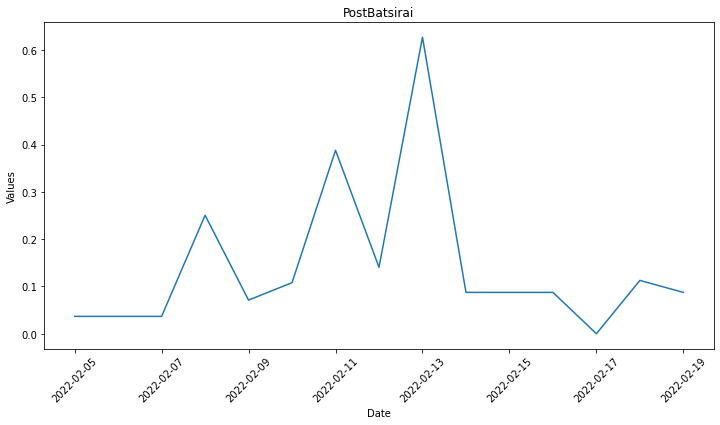

In [14]:
# Convert the column names to datetime, except for 'settl_pcod'
df_new.columns = [pd.to_datetime(col) if col != 'settl_pcod' else col for col in df_new.columns]

# Select the range of dates
post_start_date = '2022-02-05' #Batsirai onset date
post_end_date = pd.to_datetime(post_start_date) + pd.Timedelta(days=14)
date_range = pd.date_range(start=post_start_date, end=post_end_date)

# Filter the DataFrame for the selected date range
filtered_df = df_new.loc[:, date_range]

# Plotting
plt.figure(figsize=(12, 6))
for index, row in filtered_df.iterrows():
    plt.plot(date_range, row, label=df_new.at[index, 'settl_pcod'])

plt.title('PostBatsirai')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
# .axhline()

# plt.legend()
plt.show()



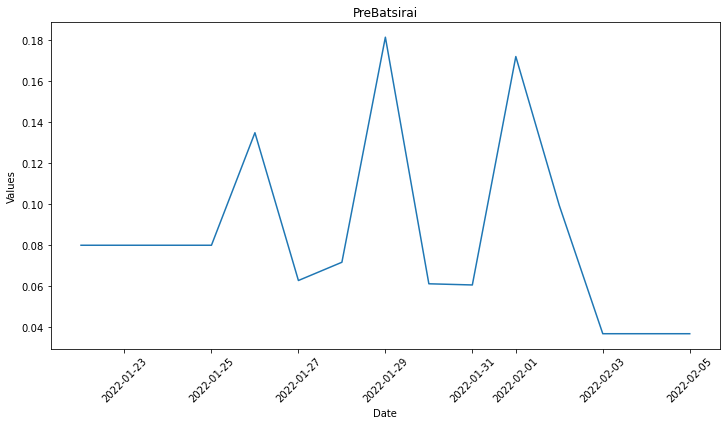

In [15]:
# Convert the column names to datetime, except for 'settl_pcod'
df_new.columns = [pd.to_datetime(col) if col != 'settl_pcod' else col for col in df_new.columns]

# Select the range of dates
pre_start_date = '2022-01-22' #Batsirai onset date
pre_end_date = pd.to_datetime(pre_start_date) + pd.Timedelta(days=14)
date_range = pd.date_range(start=pre_start_date, end=pre_end_date)

# Filter the DataFrame for the selected date range
filtered_df = df_new.loc[:, date_range]

# Plotting
plt.figure(figsize=(12, 6))
for index, row in filtered_df.iterrows():
    plt.plot(date_range, row, label=df_new.at[index, 'settl_pcod'])

plt.title('PreBatsirai')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)

# plt.legend()
plt.show()

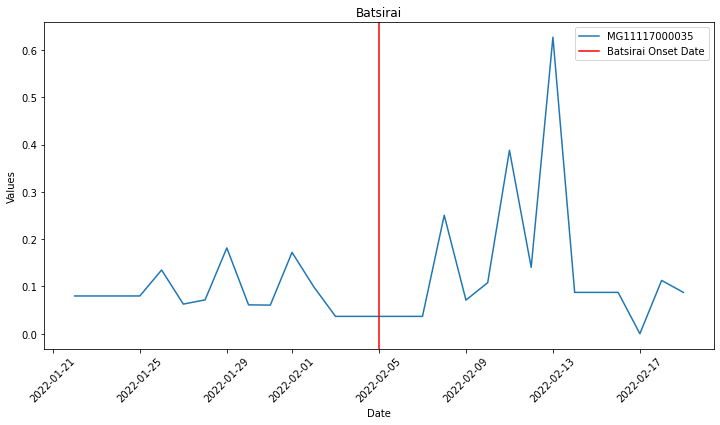

In [29]:
# Convert the column names to datetime, except for 'settl_pcod'
df_new.columns = [pd.to_datetime(col) if col != 'settl_pcod' else col for col in df_new.columns]

# Select the range of dates
pre_start_date = '2022-01-22' #Batsirai onset date
pre_end_date = pd.to_datetime(pre_start_date) + pd.Timedelta(days=28)
date_range = pd.date_range(start=pre_start_date, end=pre_end_date)

# Filter the DataFrame for the selected date range
filtered_df = df_new.loc[:, date_range]

# Plotting
plt.figure(figsize=(12, 6))
for index, row in filtered_df.iterrows():
    plt.plot(date_range, row, label=df_new.at[index, 'settl_pcod'])

plt.title('Batsirai')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.axvline(x=pd.to_datetime('2022-02-05'), color='r', linestyle='-', label='Batsirai Onset Date')
plt.legend()
plt.show()

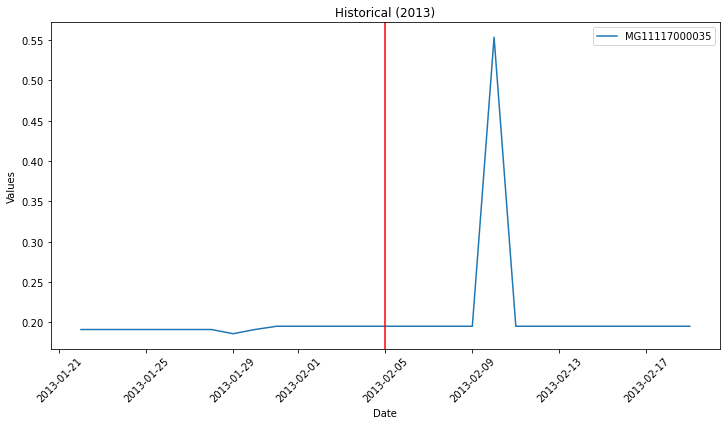

In [38]:
# Convert the column names to datetime, except for 'settl_pcod'
df_new.columns = [pd.to_datetime(col) if col != 'settl_pcod' else col for col in df_new.columns]

# Select the range of dates
pre_start_date = '2013-01-22' #Batsirai onset date
pre_end_date = pd.to_datetime(pre_start_date) + pd.Timedelta(days=28)
date_range = pd.date_range(start=pre_start_date, end=pre_end_date)

# Filter the DataFrame for the selected date range
filtered_df = df_new.loc[:, date_range]

# Plotting
plt.figure(figsize=(12, 6))
for index, row in filtered_df.iterrows():
    plt.plot(date_range, row, label=df_new.at[index, 'settl_pcod'])

plt.title('Historical (2013)')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.axvline(x=pd.to_datetime('2013-02-05'), color='r', linestyle='-')
plt.legend()
plt.show()

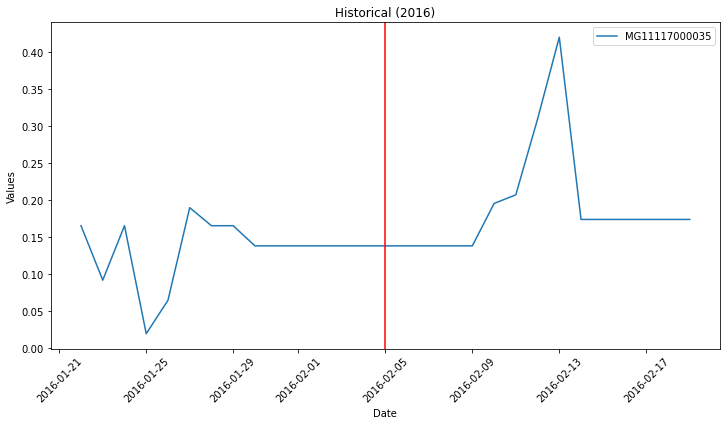

In [39]:
# Convert the column names to datetime, except for 'settl_pcod'
df_new.columns = [pd.to_datetime(col) if col != 'settl_pcod' else col for col in df_new.columns]

# Select the range of dates
pre_start_date = '2016-01-22' #Batsirai onset date
pre_end_date = pd.to_datetime(pre_start_date) + pd.Timedelta(days=28)
date_range = pd.date_range(start=pre_start_date, end=pre_end_date)

# Filter the DataFrame for the selected date range
filtered_df = df_new.loc[:, date_range]

# Plotting
plt.figure(figsize=(12, 6))
for index, row in filtered_df.iterrows():
    plt.plot(date_range, row, label=df_new.at[index, 'settl_pcod'])

plt.title('Historical (2016)')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.axvline(x=pd.to_datetime('2016-02-05'), color='r', linestyle='-')
plt.legend()
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Helper function to calculate the slope of a linear fit
def calculate_slope(x, y):
    model = LinearRegression()
    model.fit(x[:, np.newaxis], y)
    return model.coef_[0]

# Preparing the x-axis values (days) for linear regression
# We use the day number relative to the start of each period for simplicity
x_pre = np.arange(len(date_range))
x_post = np.arange(len(date_range))

# Calculating slopes for pre and post Batsirai periods
pre_slopes = []
post_slopes = []

for index, row in df_new.iterrows():
    # Filter for pre and post periods
    pre_values = df_new.loc[index, pd.date_range(start=pre_start_date, end=pre_end_date)].values
    post_values = df_new.loc[index, pd.date_range(start=post_start_date, end=post_end_date)].values

    # Calculate slopes
    pre_slope = calculate_slope(x_pre, pre_values)
    post_slope = calculate_slope(x_post, post_values)

    pre_slopes.append(pre_slope)
    post_slopes.append(post_slope)

# Calculating normalized differences between slopes
normalized_differences = [(post - pre) / pre if pre != 0 else np.nan for pre, post in zip(pre_slopes, post_slopes)]

# Creating a DataFrame to display the results
slope_differences_df = pd.DataFrame({
    'settl_pcod': df_new['settl_pcod'],
    'Pre-Batsirai Slope': pre_slopes,
    'Post-Batsirai Slope': post_slopes,
    'Normalized Slope Difference': normalized_differences
})

slope_differences_df.head()


,settl_pcod,Pre-Batsirai Slope,Post-Batsirai Slope,Normalized Slope Difference
0,MG11117000035,-0.002155,0.000796,-1.36965
